In [1]:
import matplotlib

import matplotlib.pyplot as plt
import DDFS.kalman_method as km
from DDFS.element import *
from copy import deepcopy
from tqdm.notebook import tqdm
%matplotlib inline
np.set_printoptions(precision=4, suppress=True)

para_p = {
    "type": "steps",
    "maxvalue": 120,
    "minvalue": 2,
    "steps": 20,
    "count": 0
}

para_t = {
    "type": "fixed",
    "value": 0.3
}

para_phi = {
    "type": "even",
    "minvalue": -3.14,
    "maxvalue": 3.14,
}

emit_mode = {
    "p": para_p,
    "theta": para_t,
    "phi": para_phi
}

Detector fast Design & Test package is initialized.


In [2]:
####### 1. Set up the detector, environment, emitter, and particle
d = Detector()
e = Environment()
e.update_environment("B", 3)
e.update_environment("position_resolution", True)
e.update_environment("multiple_scattering", True)
m = Emitter()
m2 = Emitter()


p = Particle()
p.update_particle("Charge", -1)
p.update_particle("Mass", 0.106)

m.add_particle(p, 1, deepcopy(emit_mode))
m2.add_particle(p, 1, deepcopy(emit_mode))



d.add_layer(SiLayer(0.0015, 10, 4000, 0, 9.9, 9.9))
for i in np.linspace(20, 2020, 10):
    d.add_layer(SiLayer(0.002, i, 4000, 1, 0.004, 0.004))

print(d)


Charge has been changed to -1

Mass has been changed to 0.106

Layer Counting: 11
Detector INFO: 
--------------------------------------------------
Idx:0	Material_budget:0.0	 Radius:10	 Half_z:4000	 Efficiency:0	 Loc0:9.9	 Loc1:9.9
Idx:1	Material_budget:0.0	 Radius:20.0	 Half_z:4000	 Efficiency:1	 Loc0:0.0	 Loc1:0.0
Idx:2	Material_budget:0.0	 Radius:242.22	 Half_z:4000	 Efficiency:1	 Loc0:0.0	 Loc1:0.0
Idx:3	Material_budget:0.0	 Radius:464.44	 Half_z:4000	 Efficiency:1	 Loc0:0.0	 Loc1:0.0
Idx:4	Material_budget:0.0	 Radius:686.67	 Half_z:4000	 Efficiency:1	 Loc0:0.0	 Loc1:0.0
Idx:5	Material_budget:0.0	 Radius:908.89	 Half_z:4000	 Efficiency:1	 Loc0:0.0	 Loc1:0.0
Idx:6	Material_budget:0.0	 Radius:1131.11	 Half_z:4000	 Efficiency:1	 Loc0:0.0	 Loc1:0.0
Idx:7	Material_budget:0.0	 Radius:1353.33	 Half_z:4000	 Efficiency:1	 Loc0:0.0	 Loc1:0.0
Idx:8	Material_budget:0.0	 Radius:1575.56	 Half_z:4000	 Efficiency:1	 Loc0:0.0	 Loc1:0.0
Idx:9	Material_budget:0.0	 Radius:1797.78	 Half_z:4000	 Effic

In [3]:
dec_info = d.get_param()
envir_info = e.get_param()
e.update_environment("multiple_scattering", False)
envir_info2 = e.get_param()




res_k = km.Resolution(dec_info, envir_info, m)
res_k2 = km.Resolution(dec_info, envir_info2, m2)



############################################## use same ramdom seed to ensure the smooth result, if not needed, you can comment below
# step_seed = 1
# mode = m.get_info("dir")["Emit_mode"][0]
# for key, item in mode.items():
#     if item["type"] == "steps":
#         step_seed *= item["steps"]

##############################################
N = 8000
result = Result(N)
result.set_emit_mode(deepcopy(emit_mode))
result2 = Result(N)
result2.set_emit_mode(deepcopy(emit_mode))


############################################## use same ramdom seed to ensure the smooth result, if not needed, you can comment below
# np.random.seed(int(np.fmod(time.time(), 10) * 1e5))
# seed = np.random.randint(0, 100000)
##############################################

for i in tqdm(range(N)):
    ############################################## use same ramdom seed to ensure the smooth result, if not needed, you can comment below
    # if i % step_seed == 0:
    #     np.random.seed(int(np.fmod(time.time(), 10)*1e5))
    #     seed = np.random.randint(0, 100000)
    # np.random.seed(seed)
    ##############################################

    res_k.generate_path()
    res_k.generate_ref_path()
    res_k.backward_kalman_estimate()
    ini, res = res_k.result_analysis()
    result.append(ini, res)

    ############################################## use same ramdom seed to ensure the smooth result, if not needed, you can comment below
    # np.random.seed(seed)
    ##############################################

    res_k2.generate_path()
    res_k2.generate_ref_path()
    res_k2.backward_kalman_estimate()
    ini, res = res_k2.result_analysis()
    result2.append(ini, res)

result.kalman_post_process_all(result.emit_mode, len(d))
result2.kalman_post_process_all(result2.emit_mode, len(d))

  0%|          | 0/8000 [00:00<?, ?it/s]

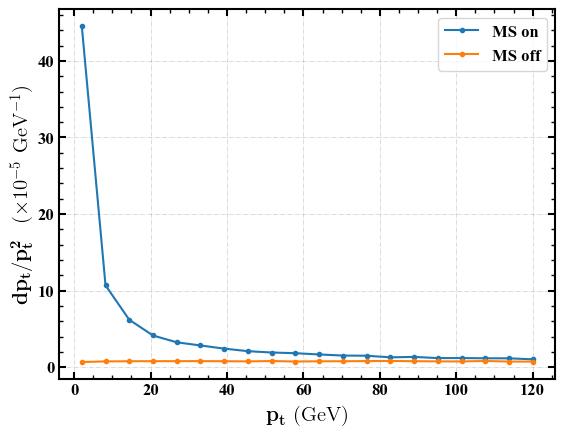

In [4]:
result.kalman_plot('p', 'dp2', emit_mode=emit_mode, layer_idx=2, filter="backward")
result2.kalman_plot('p', 'dp2', emit_mode=emit_mode, layer_idx=2, filter="backward")
plt.legend(['MS on', 'MS off'], fontsize=12)

In [5]:
try:
    os.mkdir("k_test")
except Exception as e0:
    print(e0)
result.export("k_test", "k_test", "kalman")
result2.export("k_test", "k_test2", "kalman")

[WinError 183] 当文件已存在时，无法创建该文件。: 'k_test'
start storing data to root file
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B                    | double                   | AsDtype('>f8')
p                    | double                   | AsDtype('>f8')
theta                | double                   | AsDtype('>f8')
phi                  | double                   | AsDtype('>f8')
MS                   | double                   | AsDtype('>f8')
RE                   | double                   | AsDtype('>f8')
mass                 | double                   | AsDtype('>f8')
charge               | double                   | AsDtype('>f8')
beam_spot            | double                   | AsDtype('>f8')
chi2_forward         | double                   | AsDtype('>f8')
chi2_backward        | double                   | AsDtype('>f8')
forward_dr           | double[11]               |

Please input the test number When create a Result object. or load the data from file.
Please input the test number When create a Result object. or load the data from file.
kalman
kalman


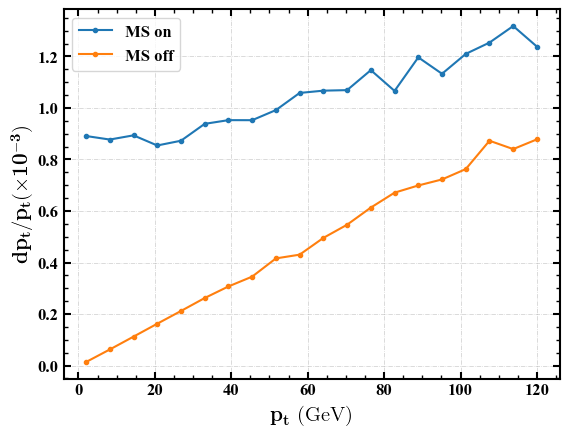

In [6]:
re_load1 = Result()
re_load2 = Result()
re_load1.load_root("k_test/k_test.root")
re_load2.load_root("k_test/k_test2.root")

re_load1.kalman_plot('p', 'dp', emit_mode=emit_mode, layer_idx=2, filter="backward")
re_load2.kalman_plot('p', 'dp', emit_mode=emit_mode, layer_idx=2, filter="backward")
plt.legend(['MS on', 'MS off'], fontsize=12)